# Survey and twiss around IPs

###  Beam Position in lab frame


In [2]:
%pwd

'/home/pbelange/abp/BBFootprint'

----------------------------------------
ip1 x 167.00476189086632  mm
----------------------------------------
ip1 y 3.745577748121975  mm
----------------------------------------
ip5 x 175.0836371214702  mm
----------------------------------------
ip5 y -0.0034688683386734677  mm


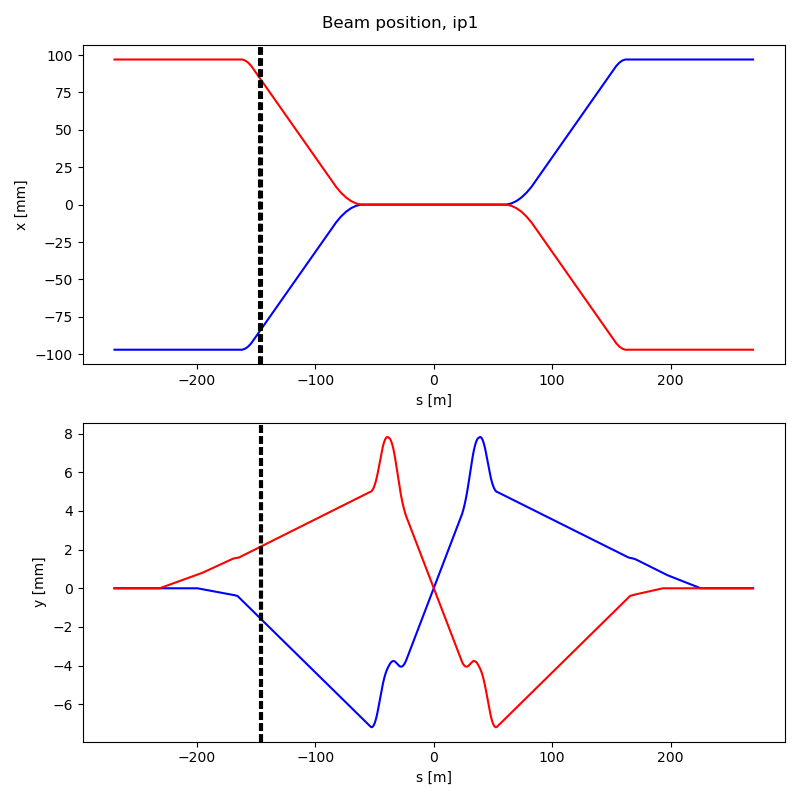

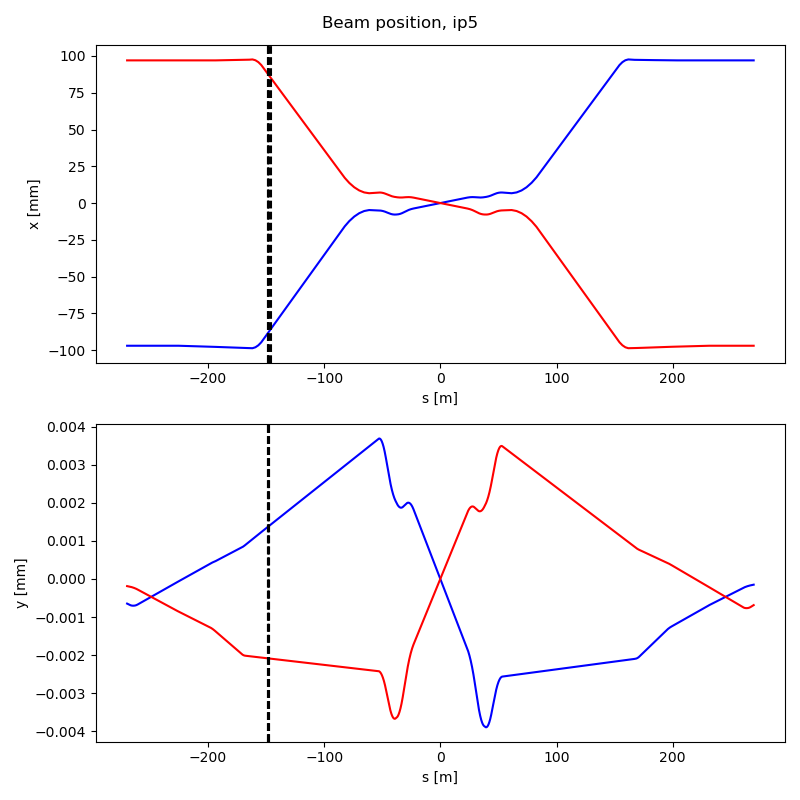

In [3]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import Backend.InteractionPoint as inp


# Importing twiss and survey
twiss_b1  = pd.read_pickle('LHC_sequence/lhcb1_twiss.pkl')
survey_b1 = pd.read_pickle('LHC_sequence/lhcb1_survey.pkl')

twiss_b2  = pd.read_pickle('LHC_sequence/lhcb2_twiss.pkl')
survey_b2 = pd.read_pickle('LHC_sequence/lhcb2_survey.pkl')


chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    ROI_twiss_b1,ROI_survey_b1 = inp.extract_IP_ROI(_IP,'b1',twiss_b1,survey_b1)
    ROI_twiss_b2,ROI_survey_b2 = inp.extract_IP_ROI(_IP,'b2',twiss_b2,survey_b2)

    
    _wires_b1 = [name for name in ROI_twiss_b1.index if ('bbcw' in name)&((f'{_IP[-1]}.u' in name)|(f'{_IP[-1]}.d' in name))]
    
    # Plotting
    
    fig, axes = plt.subplots(2, 1,figsize=(8,8))
    fig.suptitle(f'Beam position, {_IP}')
    for plane,ax in zip(['x','y'],axes.flatten()):
        
        center = ROI_twiss_b1.loc[_IP,f'{plane}_lab']
        ax.plot(ROI_twiss_b1['s_lab'],(ROI_twiss_b1[f'{plane}_lab']-center)/1e-3,'b-')
        ax.plot(ROI_twiss_b2['s_lab'],(ROI_twiss_b2[f'{plane}_lab']-center)/1e-3,'r-')
        
        print(40*'-')
        dist = []
        for wire in _wires_b1:
            
            ax.axvline(s_wire,color='k',ls='--')
            
            s_wire = ROI_twiss_b1.loc[wire,'s_lab']
            b1_pos = (ROI_twiss_b1.loc[wire,f'{plane}_lab']-center)
            b2_pos = np.interp(s_wire,ROI_twiss_b2['s_lab'],(ROI_twiss_b2[f'{plane}_lab']-center))
        
            dist.append(b2_pos-b1_pos)
        print(_IP,plane,np.mean(dist)/1e-3,' mm')
            
    
        ax.set(xlabel='s [m]', ylabel=f'{plane} [mm]')
    plt.tight_layout()



----------------------------------------
ip1 x 167.00405036118732  mm
----------------------------------------
ip1 y 4.2545250898809766  mm
----------------------------------------
ip5 x 175.60388642368642  mm
----------------------------------------
ip5 y -0.0003865603020114507  mm


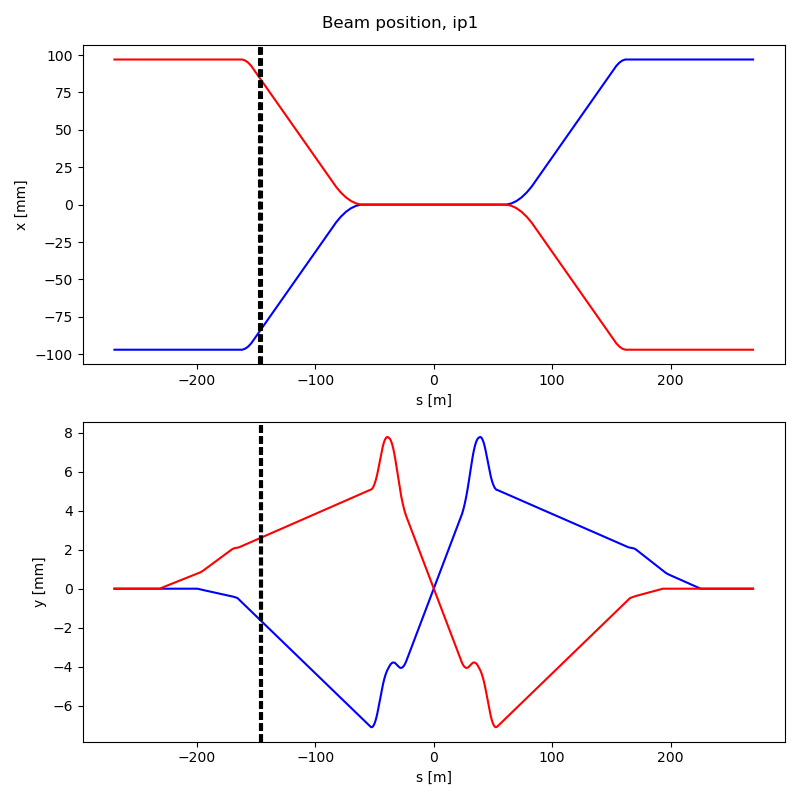

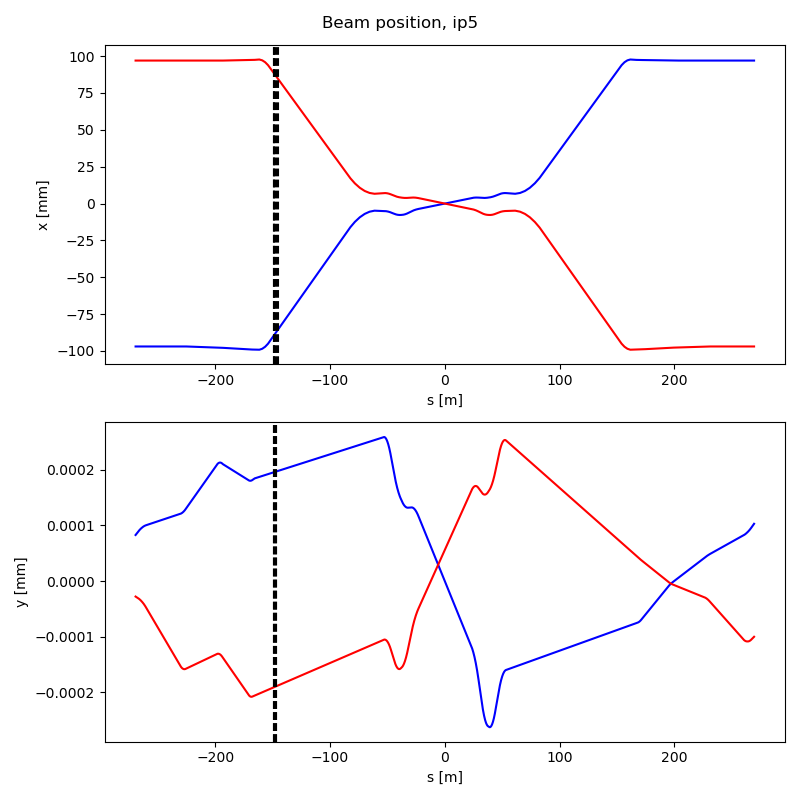

In [2]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import Backend.InteractionPoint as inp


# Importing twiss and survey
twiss_b1  = pd.read_pickle('LHC_sequence/lhcb1_twiss.pkl')
survey_b1 = pd.read_pickle('LHC_sequence/lhcb1_survey.pkl')

twiss_b2  = pd.read_pickle('LHC_sequence/lhcb2_twiss.pkl')
survey_b2 = pd.read_pickle('LHC_sequence/lhcb2_survey.pkl')


chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    ROI_twiss_b1,ROI_survey_b1 = inp.extract_IP_ROI(_IP,'b1',twiss_b1,survey_b1)
    ROI_twiss_b2,ROI_survey_b2 = inp.extract_IP_ROI(_IP,'b2',twiss_b2,survey_b2)

    
    _wires_b1 = [name for name in ROI_twiss_b1.index if ('bbcw' in name)&((f'{_IP[-1]}.u' in name)|(f'{_IP[-1]}.d' in name))]
    
    # Plotting
    
    fig, axes = plt.subplots(2, 1,figsize=(8,8))
    fig.suptitle(f'Beam position, {_IP}')
    for plane,ax in zip(['x','y'],axes.flatten()):
        
        center = ROI_twiss_b1.loc[_IP,f'{plane}_lab']
        ax.plot(ROI_twiss_b1['s_lab'],(ROI_twiss_b1[f'{plane}_lab']-center)/1e-3,'b-')
        ax.plot(ROI_twiss_b2['s_lab'],(ROI_twiss_b2[f'{plane}_lab']-center)/1e-3,'r-')
        
        print(40*'-')
        dist = []
        for wire in _wires_b1:
            
            ax.axvline(s_wire,color='k',ls='--')
            
            s_wire = ROI_twiss_b1.loc[wire,'s_lab']
            b1_pos = (ROI_twiss_b1.loc[wire,f'{plane}_lab']-center)
            b2_pos = np.interp(s_wire,ROI_twiss_b2['s_lab'],(ROI_twiss_b2[f'{plane}_lab']-center))
        
            dist.append(b2_pos-b1_pos)
        print(_IP,plane,np.mean(dist)/1e-3,' mm')
            
    
        ax.set(xlabel='s [m]', ylabel=f'{plane} [mm]')
    plt.tight_layout()



In [2]:
ls ../Apps/lhcmask/python_examples/run3_collisions_wire/

'/home/pbelange/abp/BBFootprint'

In [4]:
!which python

/home/pbelange/Apps/miniconda3/bin/python


----------------------------------------
ip1 x 167.209488113108  mm
----------------------------------------
ip1 y 3.6365135132874267  mm
----------------------------------------
ip5 x 174.98064837816685  mm
----------------------------------------
ip5 y -0.19136644379411805  mm


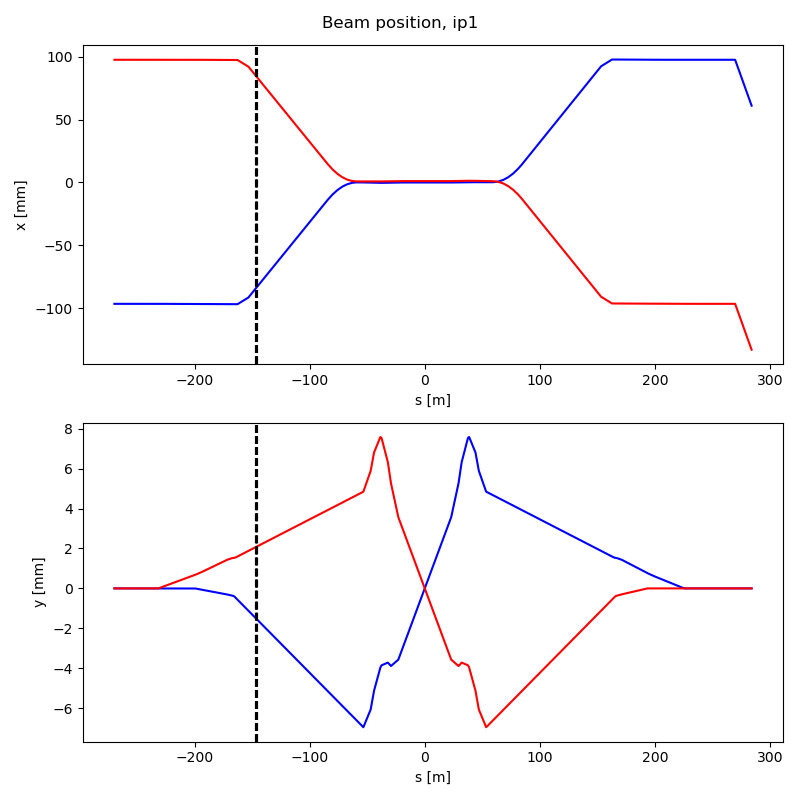

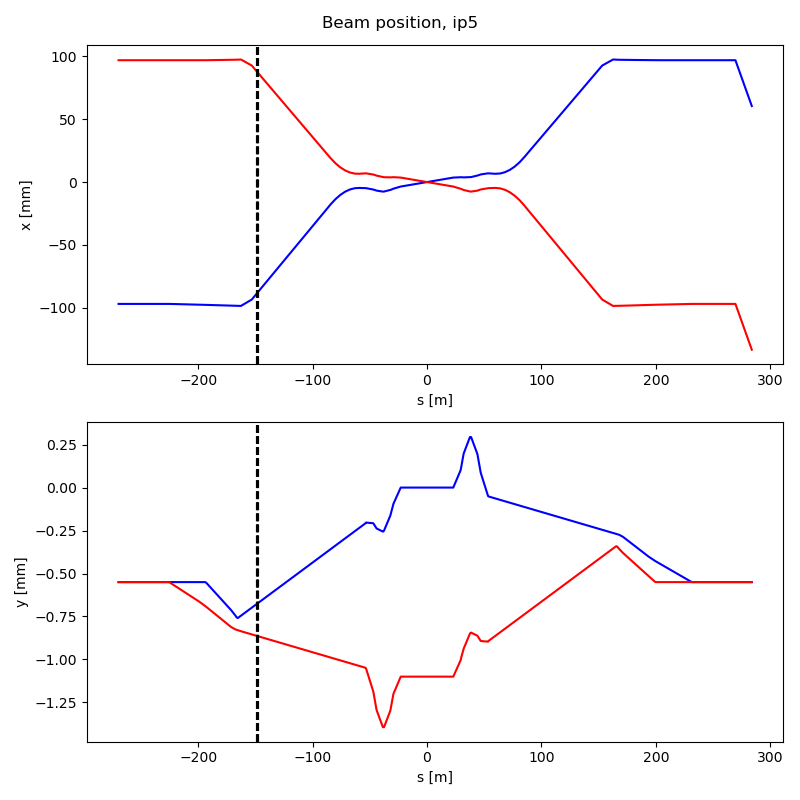

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../Apps/lhcmask/python_examples/run3_collisions_wire/')

import bbcw as bbcw
from cpymad.madx import Madx


def fromOptics(opticsFile = 'opticsfile.1',saveToFolder = None):

    # Importing LHC sequences:
    mad = Madx()
    mad.option(echo = True, warn = True)
    mad.call(file='/afs/cern.ch/eng/acc-models/lhc/current/lhc.seq')
    mad.call(file=f'/afs/cern.ch/eng/lhc/optics/runIII/RunIII_dev/2021_V6/PROTON/{opticsFile}')

    # Installing wires
    for seq,bv in zip(['lhcb1','lhcb2'],[1,-1]):
        mad.input(f'SEQEDIT, SEQUENCE={seq};FLATTEN;cycle,start=ip3;FLATTEN;ENDEDIT;')
        mad.command.beam(particle='proton',sequence=seq,charge=1,npart=1,energy=450,bv=bv)
        mad.input(f'use,sequence={seq};')
        bbcw.install_wires(mad,{'wires_at_fallback':True,'wires_L':1},seq)


    # Twiss
    twiss = {}
    survey = {}
    for seq in ['lhcb1','lhcb2']:
        mad.input(f'use,sequence={seq};')
        mad.twiss()
        mad.survey()
    
        twiss[seq[-2:].upper()] = mad.table['twiss'].dframe()
        survey[seq[-2:].upper()]= mad.table['survey'].dframe()
        
    mad.input('stop;')
    
    if saveToFolder is not None:
        for beam in ['B1','B2']:
            twiss[beam].to_pickle(f"{saveToFolder}/opticsfile{opticsFile.split('.')[-1]}_{beam}_twiss.pkl")

    return twiss,survey

%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import Backend.InteractionPoint as inp


# Importing twiss and survey
twiss,survey = fromOptics(opticsFile = 'opticsfile.30')
twiss_b1  = twiss['B1']
survey_b1 = survey['B1']

twiss_b2  = twiss['B2']
survey_b2 = survey['B2']


chosenIPs = ['ip1','ip5']
for _IP in chosenIPs:

    # ROI around IP
    ROI_twiss_b1,ROI_survey_b1 = inp.extract_IP_ROI(_IP,'b1',twiss_b1,survey_b1)
    ROI_twiss_b2,ROI_survey_b2 = inp.extract_IP_ROI(_IP,'b2',twiss_b2,survey_b2)

    
    _wires_b1 = [name for name in ROI_twiss_b1.index if ('bbcw' in name)&((f'{_IP[-1]}.u' in name)|(f'{_IP[-1]}.d' in name))]
    
    # Plotting
    
    fig, axes = plt.subplots(2, 1,figsize=(8,8))
    fig.suptitle(f'Beam position, {_IP}')
    for plane,ax in zip(['x','y'],axes.flatten()):
        
        center = ROI_twiss_b1.loc[_IP,f'{plane}_lab']
        ax.plot(ROI_twiss_b1['s_lab'],(ROI_twiss_b1[f'{plane}_lab']-center)/1e-3,'b-')
        ax.plot(ROI_twiss_b2['s_lab'],(ROI_twiss_b2[f'{plane}_lab']-center)/1e-3,'r-')
        
        print(40*'-')
        dist = []
        for wire in _wires_b1:
            s_wire = ROI_twiss_b1.loc[wire,'s_lab']
            ax.axvline(s_wire,color='k',ls='--')
            
            
            b1_pos = (ROI_twiss_b1.loc[wire,f'{plane}_lab']-center)
            b2_pos = np.interp(s_wire,ROI_twiss_b2['s_lab'],(ROI_twiss_b2[f'{plane}_lab']-center))
        
            dist.append(b2_pos-b1_pos)
        print(_IP,plane,np.mean(dist)/1e-3,' mm')
            
    
        ax.set(xlabel='s [m]', ylabel=f'{plane} [mm]')
    plt.tight_layout()


In [5]:
twiss_b1.loc['mb.a8l1.b1']

name       mb.a8l1.b1:1
keyword           sbend
s          19724.578647
betx          37.461682
alfx           0.164669
               ...     
sig63               0.0
sig64               0.0
sig65               0.0
sig66               0.0
n1                  0.0
Name: mb.a8l1.b1, Length: 256, dtype: object

In [3]:
pm.__file__


'/home/pbelange/Apps/miniconda3/lib/python3.9/site-packages/pymask/__init__.py'

## Beta functions

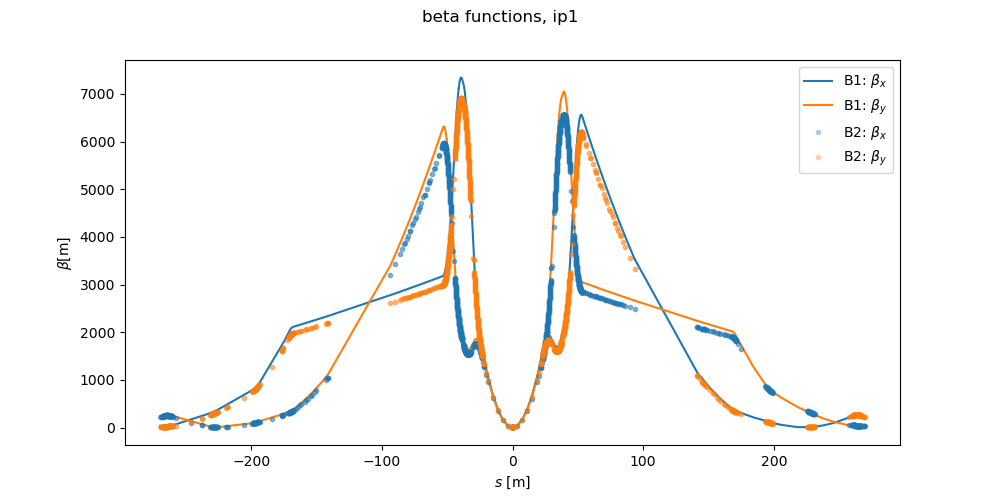

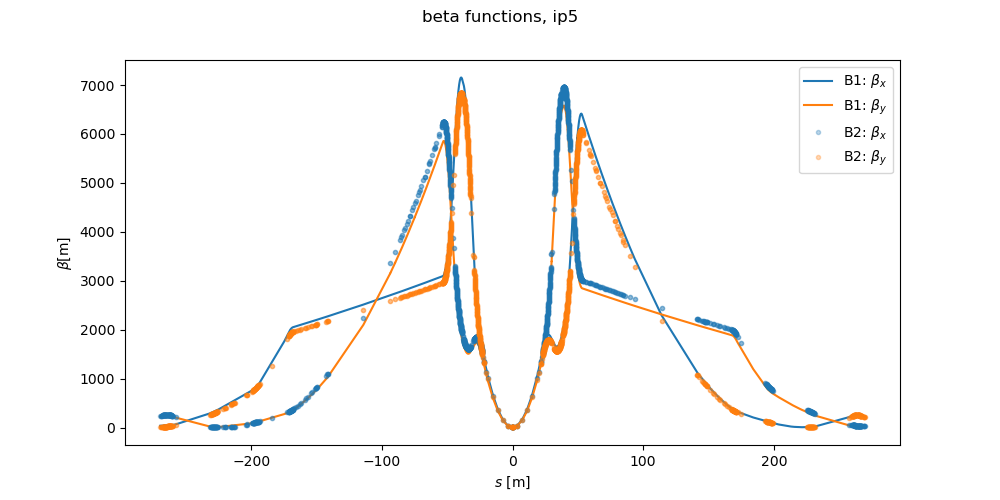

In [10]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import Backend.InteractionPoint as inp

# Importing twiss and survey
twiss_b1  = pd.read_pickle('LHC_sequence/lhcb1_twiss.pkl')
survey_b1 = pd.read_pickle('LHC_sequence/lhcb1_survey.pkl')

twiss_b2  = pd.read_pickle('LHC_sequence/lhcb2_twiss.pkl')
survey_b2 = pd.read_pickle('LHC_sequence/lhcb2_survey.pkl')


B1 = inp.Beam('b1',twiss_b1,survey_b1,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)
    
B2 = inp.Beam('b2',twiss_b2,survey_b2,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)

IP1 = inp.InteractionPoint('ip1',B1,B2)
IP5 = inp.InteractionPoint('ip5',B1,B2)


for _IP in [IP1,IP5]:
    
    # Plotting   
    #fig, axes = plt.subplots(1, 2,figsize=(10,5))
    fig = plt.figure(figsize=(10,5))
    fig.suptitle(f'beta functions, {_IP.name}')
    
    #plt.sca(axes[0])
    plt.plot(_IP.b1.twiss['s_lab'],_IP.b1.twiss['betx'],color='C0',label=r'B1: $\beta_x$')
    plt.plot(_IP.b1.twiss['s_lab'],_IP.b1.twiss['bety'],color='C1',label=r'B1: $\beta_y$')
    
    plt.plot(_IP.b2.twiss['s_lab'],_IP.b2.twiss['betx'],'.',color='C0',alpha=0.3,label=r'B2: $\beta_x$')
    plt.plot(_IP.b2.twiss['s_lab'],_IP.b2.twiss['bety'],'.',color='C1',alpha=0.3,label=r'B2: $\beta_y$')
    
    
    plt.legend()
    plt.xlabel(r'$s$ [m]')
    plt.ylabel(r'$\beta$[m]')

### Beam-beam separation

In [ ]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import Backend.InteractionPoint as inp

# Importing twiss and survey
twiss_b1  = pd.read_pickle('LHC_sequence/lhcb1_twiss.pkl')
survey_b1 = pd.read_pickle('LHC_sequence/lhcb1_survey.pkl')

twiss_b2  = pd.read_pickle('LHC_sequence/lhcb2_twiss.pkl')
survey_b2 = pd.read_pickle('LHC_sequence/lhcb2_survey.pkl')


B1 = inp.Beam('b1',twiss_b1,survey_b1,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)
    
B2 = inp.Beam('b2',twiss_b2,survey_b2,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)

IP1 = inp.InteractionPoint('ip1',B1,B2)
IP5 = inp.InteractionPoint('ip5',B1,B2)


for _IP in [IP1,IP5]:
    
    # Plotting   
    fig, axes = plt.subplots(1, 2,figsize=(10,5))
    fig.suptitle(f'Beam-Beam separation, {_IP.name}')
    
    plt.sca(axes[0])
    plt.plot(_IP.bb['s'],np.abs(_IP.bb['dx'])/1e-3,'-o',color='C1',label=r'$|d_x|$')
    plt.plot(_IP.bb['s'],np.abs(_IP.bb['dy'])/1e-3,'-o',color='C2',label=r'$|d_y|$')
    plt.legend()
    plt.xlabel(r'$s$ [m]')
    plt.ylabel('BB separation [mm]')
    plt.ylim([-2,25])
    
    plt.sca(axes[1])
    plt.plot(_IP.bb['s'],np.abs(_IP.bb['dx_n']),'-o',color='C1',label=r'$|d_x^\mathrm{norm}|$')
    plt.plot(_IP.bb['s'],np.abs(_IP.bb['dy_n']),'-o',color='C2',label=r'$|d_y^\mathrm{norm}|$')
    plt.legend()
    plt.xlabel(r'$s$ [m]')
    plt.ylabel(r'BB separation [$\sigma$]')
    plt.ylim([-2,25])
    
    fig = plt.figure()
    fig.suptitle(f'Flatness {_IP.name}')
    plt.plot(_IP.bb['s'],_IP.bb['r'],'-o',color='C3',label=r'$r = \sigma_y/\sigma_x$')
    plt.legend()
    plt.xlabel(r'$s$ [m]')
    plt.ylabel(r'Beam size ratio')

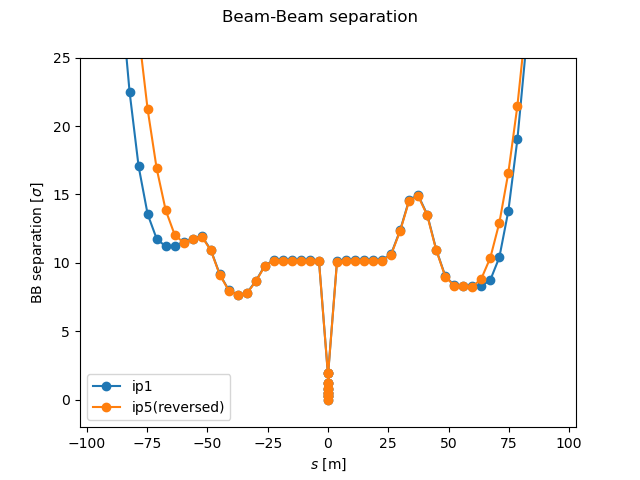

In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import Backend.InteractionPoint as inp

# Importing twiss and survey
twiss_b1  = pd.read_pickle('LHC_sequence/lhcb1_twiss.pkl')
survey_b1 = pd.read_pickle('LHC_sequence/lhcb1_survey.pkl')

twiss_b2  = pd.read_pickle('LHC_sequence/lhcb2_twiss.pkl')
survey_b2 = pd.read_pickle('LHC_sequence/lhcb2_survey.pkl')


B1 = inp.Beam('b1',twiss_b1,survey_b1,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)
    
B2 = inp.Beam('b2',twiss_b2,survey_b2,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)

IP1 = inp.InteractionPoint('ip1',B1,B2)
IP5 = inp.InteractionPoint('ip5',B1,B2)


fig = plt.figure()
fig.suptitle(f'Beam-Beam separation')

for _IP in [IP1,IP5]:
    
    # Plotting   
   
    dx_n_tot = np.sqrt(_IP.bb['dx_n']**2 + _IP.bb['dy_n']**2)
    if _IP.name == 'ip1':
        plt.plot(_IP.bb['s'],dx_n_tot,'-o',label=_IP.name)
    else:
        plt.plot(-_IP.bb['s'],dx_n_tot,'-o',label=_IP.name + '(reversed)')
    plt.legend()
    
    plt.xlabel(r'$s$ [m]')
    plt.ylabel(r'BB separation [$\sigma$]')
    
    plt.ylim([-2,25])
    
